<a href="https://colab.research.google.com/github/Codigcar/ComplejidadAlgoritmica/blob/master/week10/10_MST_Kruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Expansion Tree (MST)

## Kruskal

### Disjoint Set with Path compression



In [ ]:
class DisjointSet:
    def __init__(self, n):
        self.id = [-1]*n

    def find(self, a):
        if self.id[a] >= 0:
            grandpa = self.find(self.id[a])
            self.id[a] = grandpa
            return grandpa

        return a

    def union(self, a, b):
        parentA = self.find(a)
        parentB = self.find(b)
        if parentA == parentB:
            return

        if -self.id[parentA] < -self.id[parentB]:
            self.id[parentB] += self.id[parentA]
            self.id[parentA] = parentB
        else:
            self.id[parentA] += self.id[parentB]
            self.id[parentB] = parentA

## Kruskal

In [ ]:
import heapq

def kruskal(G):
    n = len(G)                        ''' Numero de nodos del grafo G '''
    Gprima = [[] for _ in range(n)]   ''' Crea el grafo G prima '''
    ds = DisjointSet(n)               ''' Ayuda a determinar si existe ciclo '''
    edges = []                        ''' Cola de prioridad, ordena los arreglos de manera ascendente '''
    for u in range(n):
        for v, w in G[u]:
            heapq.heappush(edges, (w, u, v))  ''' Cada uno de los arcos se agrega a la cola de prioridad '''
                                              ''' w: peso; peso está como primer parametro para que se ordene mediante el peso '''

    numEdges = 0                          ''' Inicializa contador de arcos que se han agregadol '''
    while numEdges < n-1:                 ''' Mientras que el numero de arcos en G prima sea menor a n-1 '''
        w, u, v = heapq.heappop(edges)    ''' Se selecciona el arco más chiquito de la colaa de prioridad'''
        if ds.find(u) != ds.find(v):      ''' Preguntamos si el vertice U y V de dicho arco forma un ciclo '''
            ds.union(u, v)                ''' Unimos en el conjunto disjunto '''
            Gprima[u].append((v, w))       ''' Y agregamos dicho arco a nuestro grafo G prima'''
            Gprima[v].append((u, w))
            numEdges += 1                 ''' Agregamos el numero de arco '''

    return Gprima

### Testing things out

In [ ]:
import graphviz as gv

def drawAL(G):
    dot = gv.Graph(comment='Nada', strict=True)
    n = len(G)
    for u in range(n):
        dot.node(str(u), str(u))
    
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v), label=str(w))

    dot.graph_attr['rankdir'] = 'BT'
    return dot

In [ ]:
G = [[(2, 2), (3, 9), (4, 6)],
     [(2, 6), (5, 5)],
     [(0, 2), (1, 6), (6, 6)],
     [(0, 9)],
     [(0, 6), (6, 1)],
     [(1, 5), (6, 4), (7, 4)],
     [(2, 6), (4, 1), (5, 4)],
     [(5, 4)]]

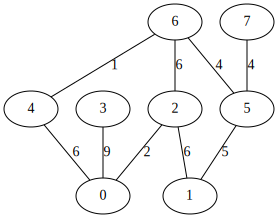

In [ ]:
drawAL(G)

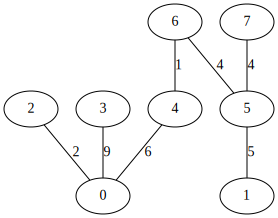

In [ ]:
Gprima = kruskal(G)
drawAL(Gprima)



```
# E`sto tiene formato de código`
```

# Ejercicio de Clusters

In [ ]:
def klusterkal(G, k):
    n = len(G)
    Gprima = [[] for _ in range(n)]
    ds = DisjointSet(n)
    edges = []
    for u in range(n):
        for v, w in G[u]:
            heapq.heappush(edges, (w, u, v))

    numEdges = 0
    while numEdges < n-k:
        w, u, v = heapq.heappop(edges)
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            Gprima[u].append((v, w))
            Gprima[v].append((u, w))
            numEdges += 1

    return Gprima

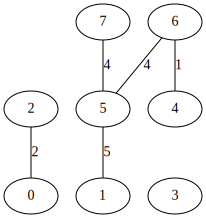

In [ ]:
klusters = klusterkal(G, 3)
drawAL(klusters)